In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import (
    QuantumCircuit,  
    IBMQ, 
    assemble, 
    transpile,
    execute,
    Aer,
)
from qiskit.test.mock import FakeAthens
import math

IBMQ.save_account("5743a5c607636e43b7431c0370ec874af29cbf102ad69bcfc87a0fbbd1cf560fd841e69aef0e96eb0e1b6e3a59c5c3d72d89623b46f0964099e0195708aa9c05")

configrc.store_credentials:WARNING:2022-03-09 01:41:46,470: Credentials already present. Set overwrite=True to overwrite.


In [2]:
def getRootiSwapHC(qc:QuantumCircuit=QuantumCircuit(2)):
    qc.rxx(math.pi / 4, 0, 1)
    qc.ryy(math.pi / 4, 0, 1)
    return qc.to_instruction(label="√iSWAP†")
    
def getRootiSwap(qc:QuantumCircuit=QuantumCircuit(2)):
    qc.rxx(-math.pi / 4, 0, 1)
    qc.ryy(-math.pi / 4, 0, 1)
    return qc.to_instruction(label="√iSWAP")

def getGGate(a, qc=QuantumCircuit(2)):
    qc.append(getRootiSwap(), [0, 1])
    qc.rz(-a, 0)
    qc.rz(a, 1)
    qc.append(getRootiSwapHC(), [0, 1])
    return qc.to_instruction(label="G")

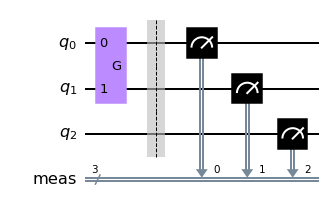

In [3]:
circuit = QuantumCircuit(3)
circuit.append(getGGate(math.pi / 4), [0, 1])

circuit.measure_all()
circuit.draw(output="mpl")

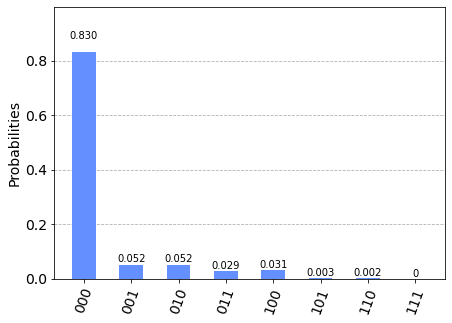

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend("ibmq_bogota")

counts = execute(circuit, device).result().get_counts()
plot_histogram(counts)